In [36]:
#Importing ands reading file

In [1]:
#common libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#libraries for NLP(text classification)
import re

import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
#if you already have stop words and wordnet then no need to excecute above 2 command

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# nltk.download('stopwords')#if you already have stop words dont need to excecute this command

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
fake=pd.read_csv('Fake.csv')#contains all the fake news-->> label it as 1
true=pd.read_csv('True.csv')#contains all the true news-->> label it as 0

In [ ]:
#EDA

In [ ]:
#Graps of different subjects,false and true, make wordcloud

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
print('Shape of fake ',fake.shape,'\n','Shape of true ',true.shape)

Shape of fake  (23481, 4) 
 Shape of true  (21417, 4)


In [ ]:
#the number of both the types of news is almost same

In [8]:
fake['label']=1
true['label']=0

In [9]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
#added new column in both named as label 

In [11]:
true.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [12]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
#no missing values in both the datasets

In [ ]:
#Cleaning the data sets

In [13]:
df=pd.concat([true,fake])#joining both the data sets

In [14]:
df.shape#shape of the new dataset

(44898, 5)

In [15]:
df['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


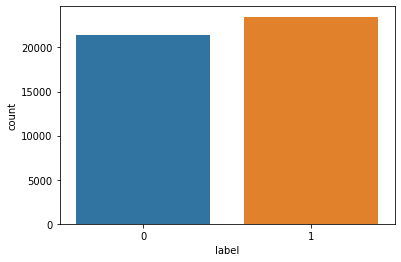

In [16]:
sns.countplot(df.label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


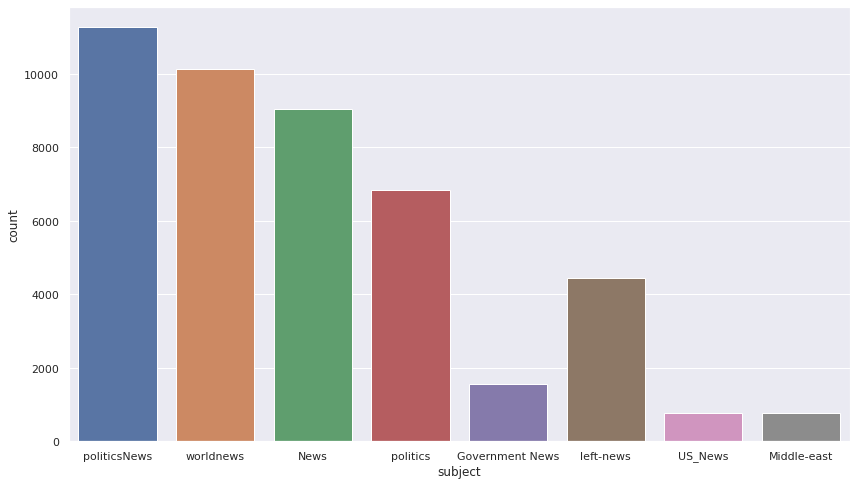

In [17]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(df.subject)

In [18]:
#feature creation
#making a new column out of the existing title and text by joining them
df['news']=df['title']+df['text']

In [19]:
df.head()

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...


In [20]:
X = df['news']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
#cleaning-->1)smaller case  2)only alphabets
def clean(data):
    data=data.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    
    return data 

In [22]:
#apply the function made in previous cell to the news column
df['news'] = df['news'].apply(lambda x : clean(x))

In [23]:
df['news'][0]

0    as u s  budget fight looms  republicans flip t...
0     donald trump sends out embarrassing new year ...
Name: news, dtype: object

In [24]:
#making two pipelines for 2 different type of models
#naive bayes and linear svc classifier
#will use themone by one

In [25]:
#making pipelines

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [ ]:
#using naive bayes for first model

In [26]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

In [28]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[6514  586]
 [ 363 7354]]


In [29]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7100
           1       0.93      0.95      0.94      7717

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817



In [30]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9359519470878046


In [ ]:
#using linear SVC for second model

In [31]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [32]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [33]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7080   20]
 [  46 7671]]


In [34]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7100
           1       1.00      0.99      1.00      7717

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



In [35]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9955456570155902
